# Assignment 2 Supervised learning: Classification and regression

### Part A - Linear Regression

##### Step 1: Data Preparation
Feature transformations?
Load data + apply regularization (mean 0 and standard deviation 1)

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from ucimlrepo import fetch_ucirepo 

import plotly.io as pio

pio.renderers.default = "notebook"  # oder "none" für keine automatische Ausgabe

In [9]:
# Load data 

# fetch dataset 
gas_turbine_co_and_nox_emission_data_set = fetch_ucirepo(id=551) 
  
# data (as pandas dataframes) 
X = gas_turbine_co_and_nox_emission_data_set.data.features 

In [10]:
y = X[X.columns[-1:]]                           # only NOx

X.drop(columns=X.columns[-2:], inplace=True)    #drop NOx and CO
X.drop(columns="year", inplace=True)            #drop year

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))

X.shape: (36733, 9)
y.shape: (36733, 1)


In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to a DataFrame (optional, for better readability)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP
0,-1.762362,0.871052,0.401627,-0.451875,-0.377702,0.272119,0.536589,0.074502,-0.149273
1,-1.801920,0.809164,0.440351,-0.458207,-0.384376,0.266417,0.568742,0.074502,-0.154783
2,-1.854113,0.824636,0.483432,-0.442831,-0.375081,0.289227,0.589203,0.102033,-0.017015
3,-1.875718,0.809164,0.523263,-0.445415,-0.393909,0.289227,0.586280,0.097551,-0.064774
4,-1.874644,0.731804,0.505837,-0.448904,-0.392479,0.255012,0.561434,0.074502,-0.138251
...,...,...,...,...,...,...,...,...,...
36728,-1.891401,2.387315,1.060287,-0.981255,-1.543602,-2.533516,-0.667691,-1.563948,-1.515021
36729,-1.818812,2.402787,1.118097,-0.947401,-1.560524,-2.499301,-0.566847,-1.582516,-1.576558
36730,-1.642292,2.387315,1.199903,-0.791702,-1.598418,-2.476491,-0.391466,-1.645262,-1.468179
36731,-1.588354,2.418260,1.129438,0.074403,-0.476847,-0.258214,0.577511,-0.134226,-0.265917


##### Step 2: Linear Regression + Analysis

Split into train/test - 1 level cross validation

Introduce regularization parameter - choose range of lambda values - for each value use K = 10 fold cross validation to estimate the generalization error - Plot figure estimated generalization error as a function of lambda

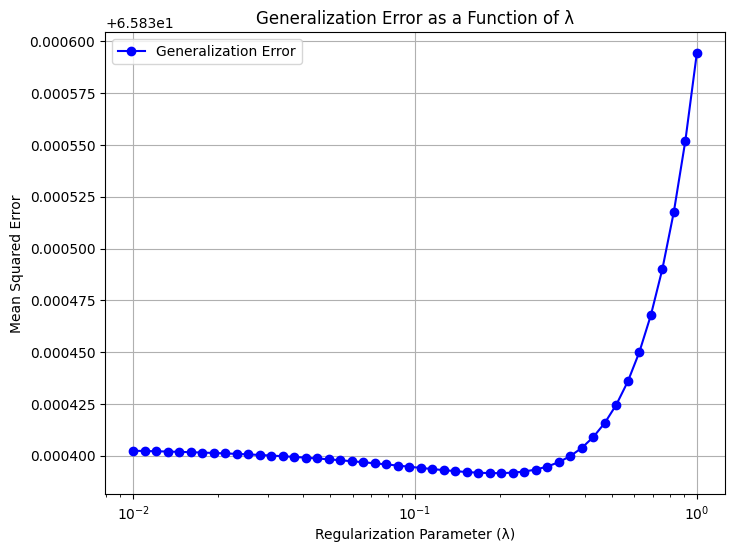

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import matplotlib.pyplot as plt

# Define a range of lambda values (regularization parameters)
lambdas = np.logspace(-2, 0, 50)  # From 0.01 to 1 in 50 steps
#lambdas = range(-6,10,1)

# Prepare a list to store the mean cross-validated error for each lambda
mean_errors = []

# Set up K-fold cross-validation (K=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Loop through each lambda value
for l in lambdas:
    # Initialize Ridge regression model with current lambda (alpha in Ridge)
    model = Ridge(alpha=l)
    
    # Compute cross-validated MSE scores (negative because Scikit-Learn returns negative MSE for scoring)
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='neg_mean_squared_error')
    
    # Take the mean of the negative MSE scores to get the average error for this lambda
    mean_error = -np.mean(cv_scores)
    mean_errors.append(mean_error)

# Plot the generalization error as a function of lambda
plt.figure(figsize=(8, 6))
plt.plot(lambdas, mean_errors, marker='o', linestyle='-', color='b', label='Generalization Error')
plt.xscale('log')  # Use a logarithmic scale for lambda
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('Mean Squared Error')
plt.title('Generalization Error as a Function of λ')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Find the index of the minimum error
min_index = np.argmin(mean_errors)

# Retrieve the corresponding lambda value
optimal_lambda = lambdas[min_index]

# Print the optimal lambda and its corresponding error
print(f"Optimal λ: {optimal_lambda}")
print(f"Minimum Mean Squared Error: {mean_errors[min_index]}")

Optimal λ: 0.20235896477251566
Minimum Mean Squared Error: 65.83039159956026


### Part B: Model comparisons (LR, ANN, Baseline)

##### Step 1: Data Preparation

Implement two-level cross validation with K1=K2=10

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Set up KFold for outer cross-validation (K=10)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_indices = list(kf.split(X_scaled))  # Store indices to reuse across models

# Storage for errors
baseline_errors, ridge_errors, ann_errors = [], [], []

##### Step 2: Baseline

Implement Base model: predicting the mean

##### Step 3: Apply LR from Part A

##### Step 4: ANN

##### Step 5: Comparison

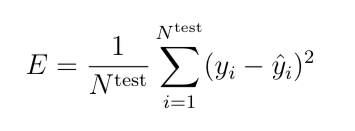

##### Step 6: Statistical Evaluation